# Logarithm transformation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

In [2]:
# load the California House price data from Scikit-learn - display top 5 rows
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


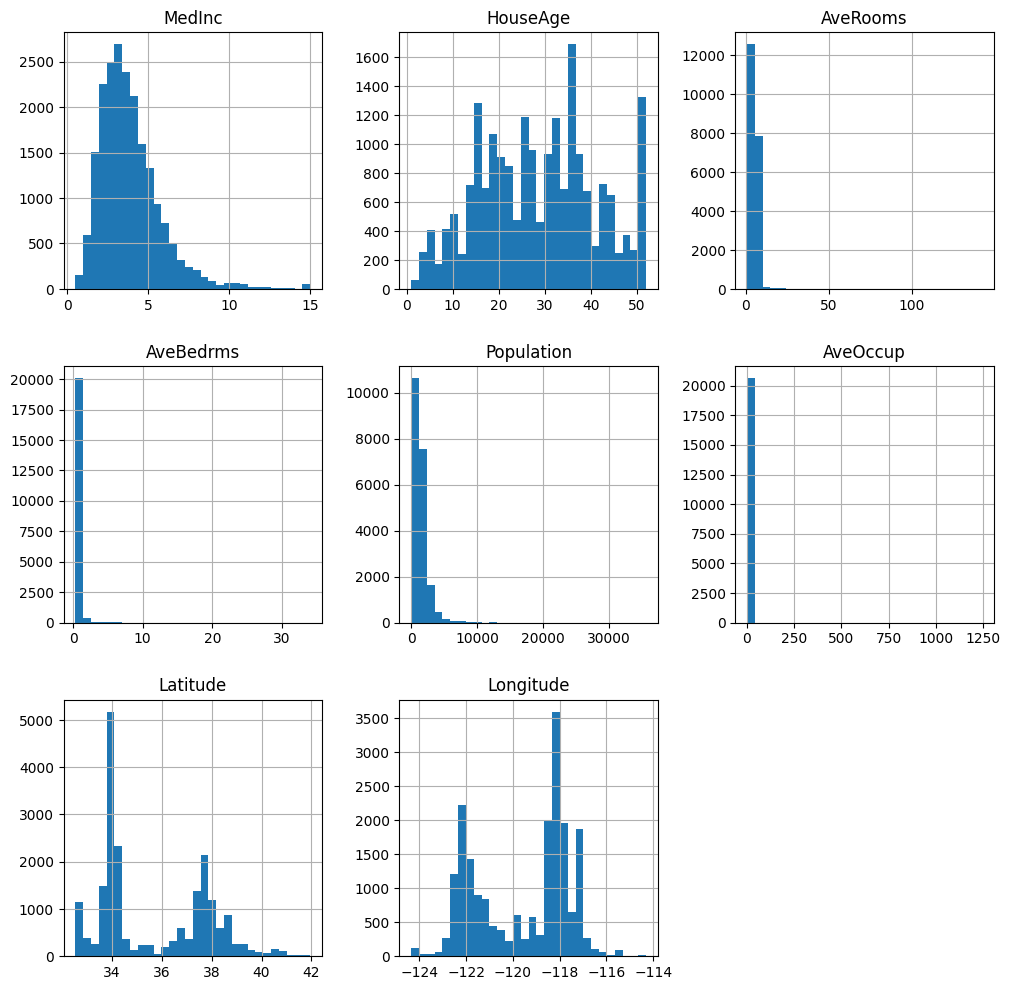

In [3]:
# Plot histograms
X.hist(bins=30, figsize=(12, 12))
plt.show()

In [4]:
# Plot histogram and Q-Q plots to explore the variable distribution

def diagnostic_plots(df, variable):

    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

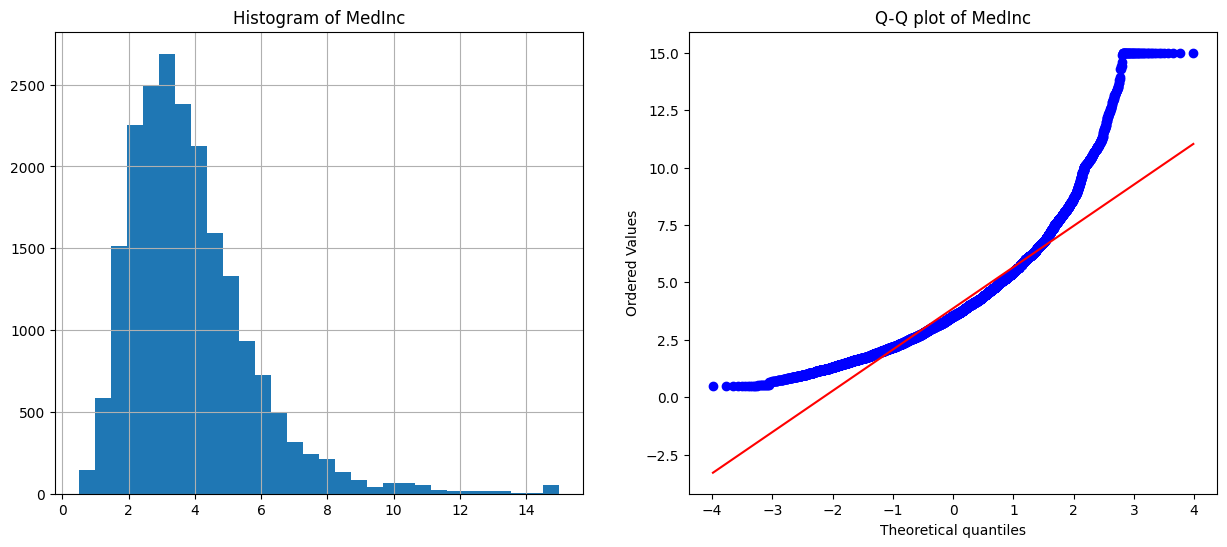

In [5]:
diagnostic_plots(X, "MedInc")

# Logarithmic transformation with NumPy

In [6]:
# make a copy of the dataframe to store the modified variables
X_tf = X.copy()

In [7]:
variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

In [8]:
X_tf[variables] = np.log(X[variables])

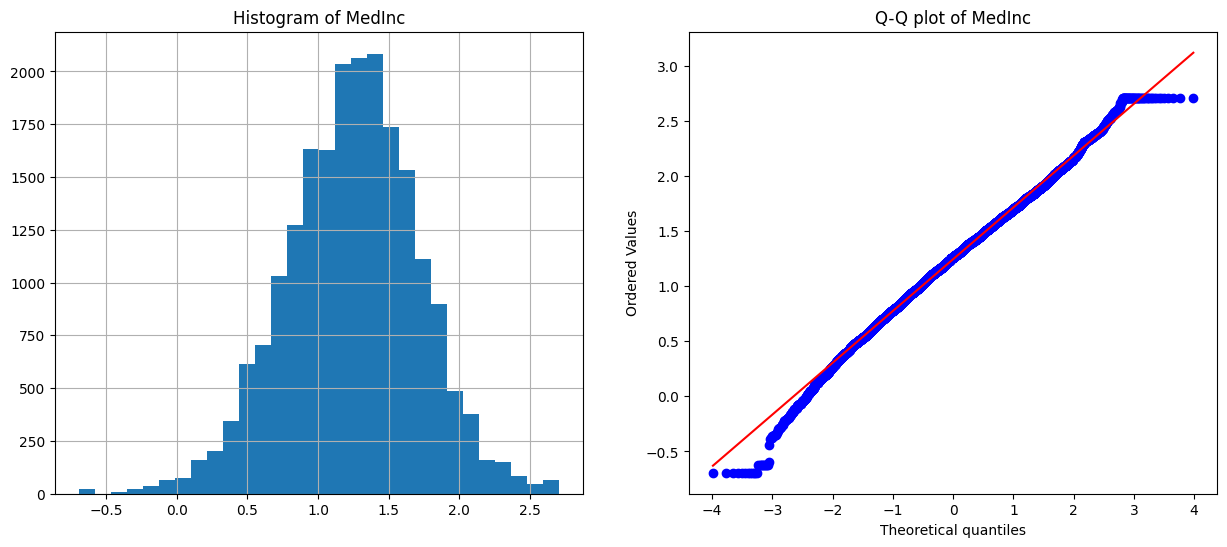

In [9]:
# use diagnostic plot to verify variable transformation
diagnostic_plots(X_tf, "MedInc")

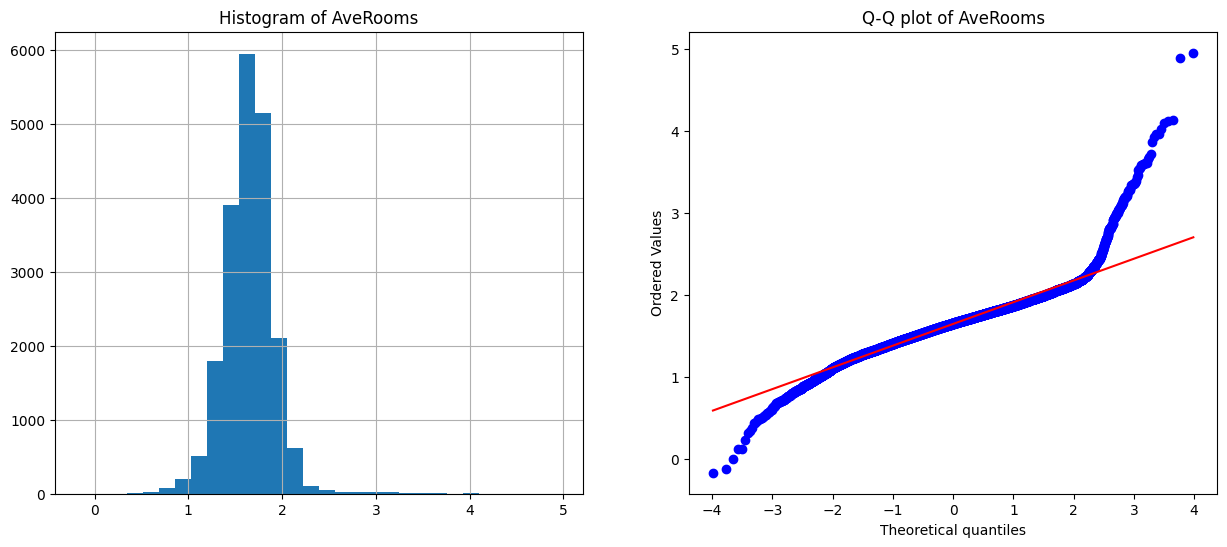

In [10]:
diagnostic_plots(X_tf, "AveRooms")

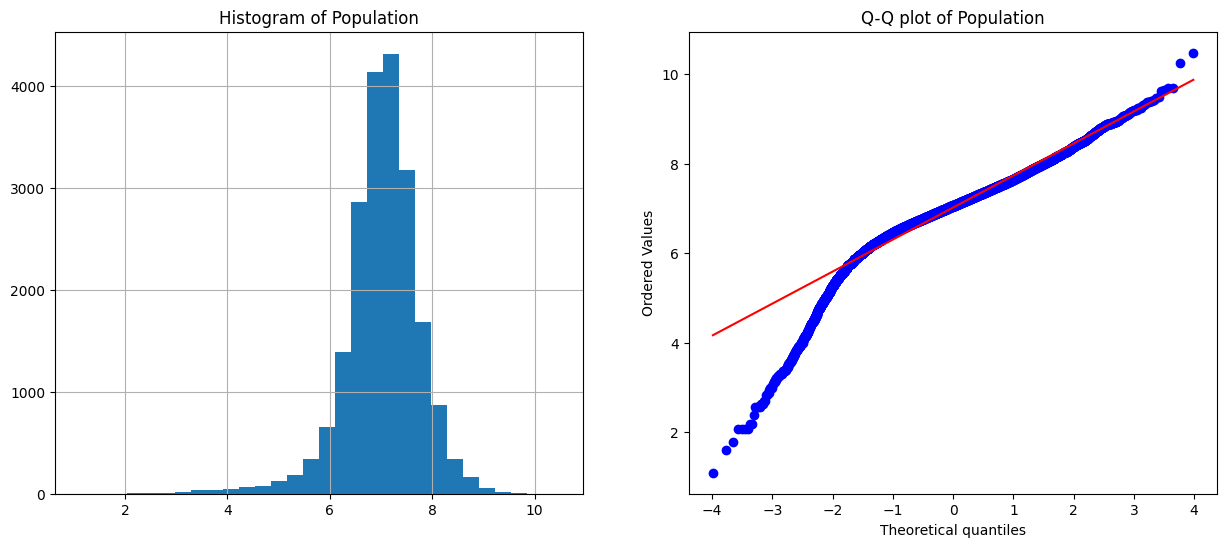

In [11]:
diagnostic_plots(X_tf, "Population")

# Logarithmic transformation with Scikit-learn

In [12]:
from sklearn.preprocessing import FunctionTransformer

In [13]:
# copy dataframe
X_tf = X.copy()

In [14]:
# set up transformer with NumPy log as parameter
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [15]:
# transform subset of dataframe (remember that we made a copy earlier.)
X_tf[variables] = transformer.transform(X[variables])

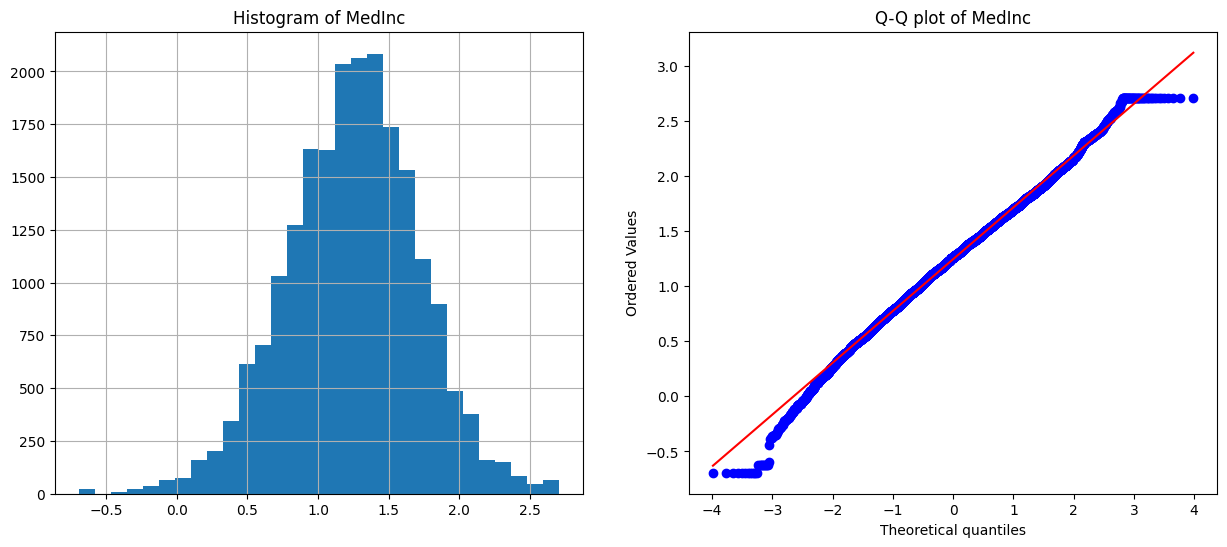

In [16]:
# verify variable transformation
diagnostic_plots(X_tf, "MedInc")

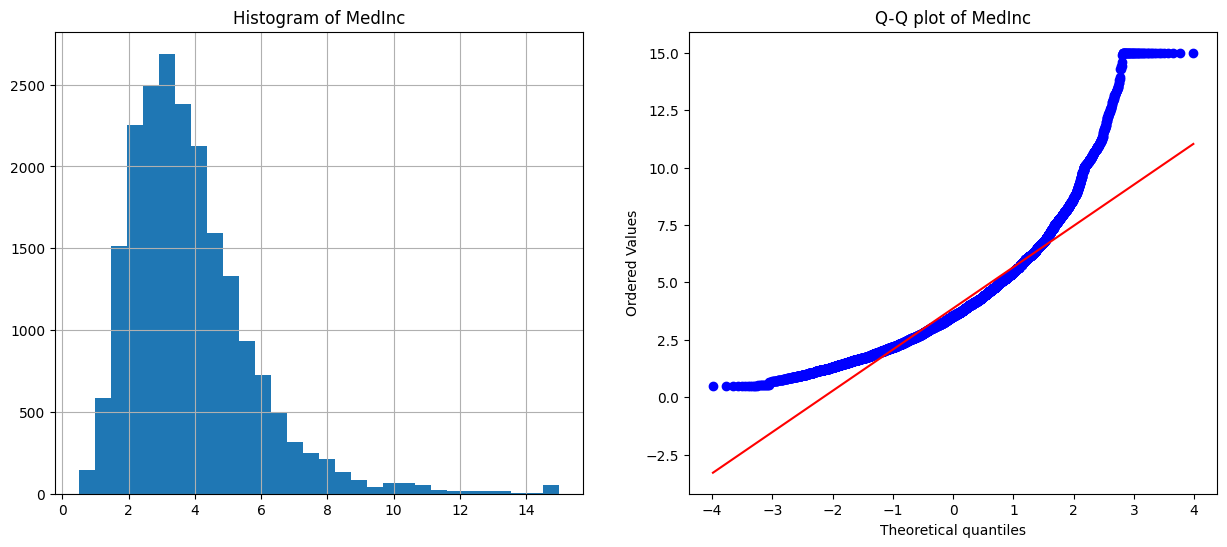

In [17]:
# revert to original representation
X_tf[variables] = transformer.inverse_transform(X_tf[variables])
diagnostic_plots(X_tf, "MedInc")

# Logarithmic transformation with Feature-engine

In [18]:
from feature_engine.transformation import LogTransformer

In [19]:
# set up transformer, then fit
lt = LogTransformer(variables=variables)
lt.fit(X)

LogTransformer(variables=['MedInc', 'AveRooms', 'AveBedrms', 'Population'])

In [20]:
lt.variables_

['MedInc', 'AveRooms', 'AveBedrms', 'Population']

In [21]:
X_tf = lt.transform(X)

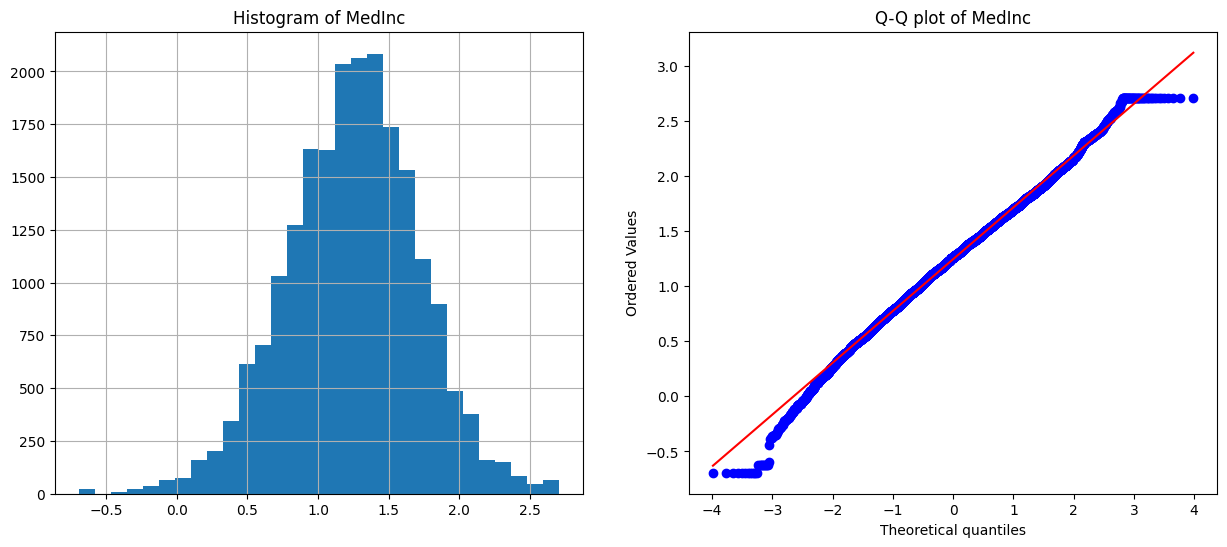

In [22]:
# verify variable transformation
diagnostic_plots(X_tf, "MedInc")

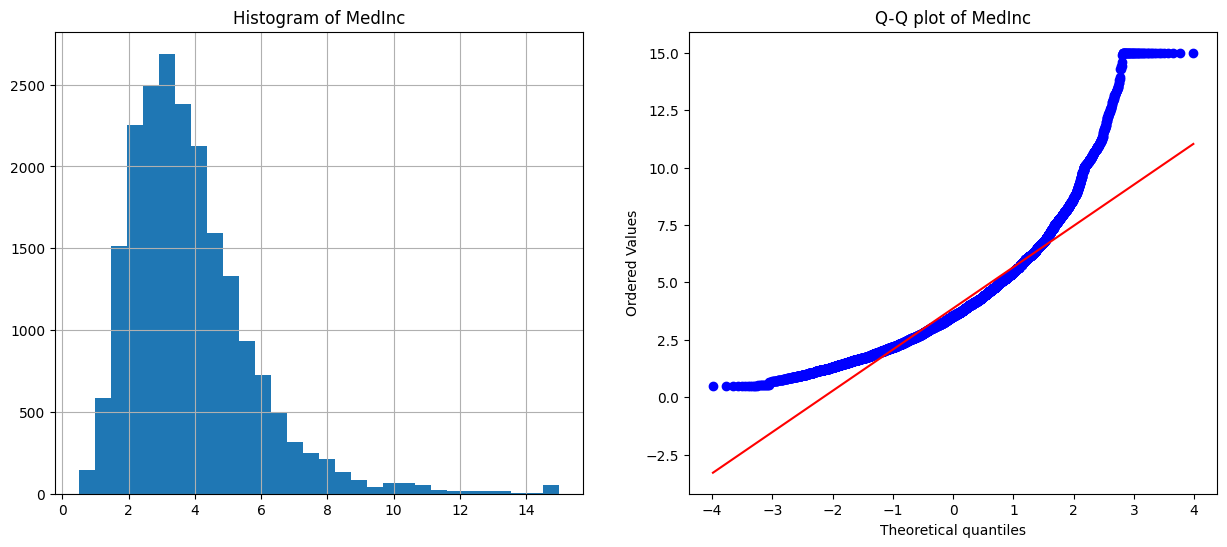

In [23]:
# revert to original representation
X_tf = lt.inverse_transform(X_tf)
diagnostic_plots(X_tf, "MedInc")

# Logarithm plus constant
 -If you want to add a constant to the variables (example: some values are 0 or negative)

In [24]:
# make a copy of original data
X_tf = X.copy()

In [25]:
# apply log plus a constant. we can also use np.log1p()
X_tf[variables] = np.log(X[variables] + 1)

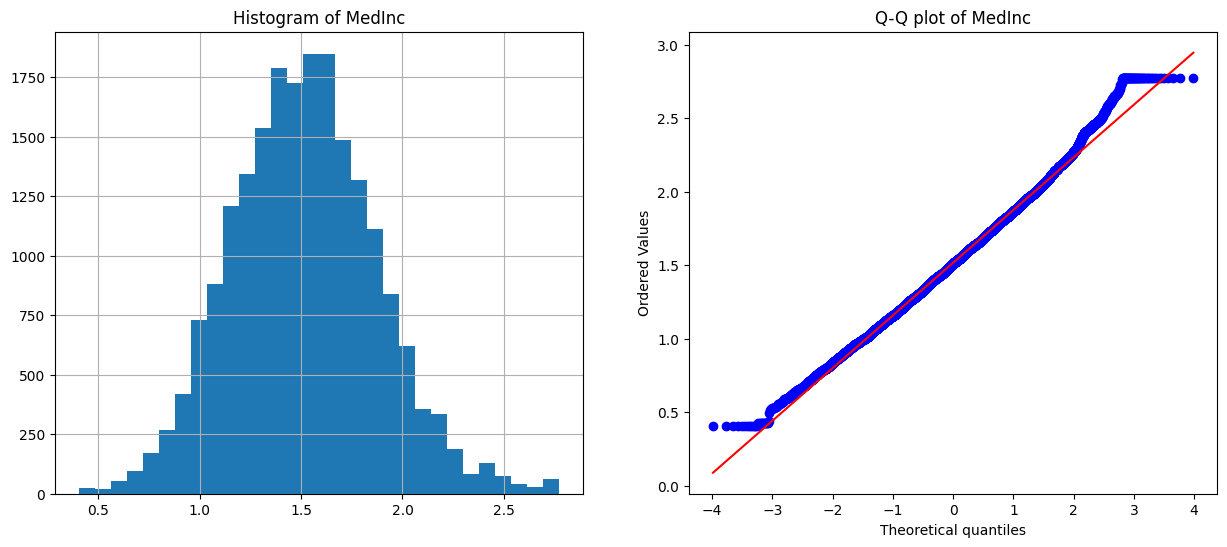

In [26]:
# verify variable transformation
diagnostic_plots(X_tf, "MedInc")

## Scikit-learn

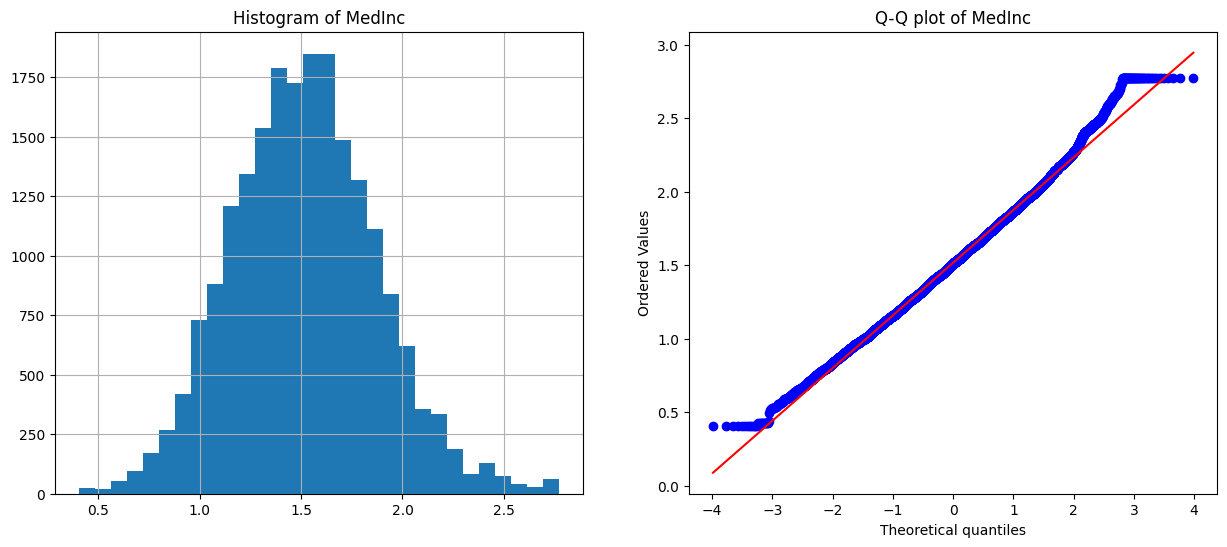

In [27]:
# copy dataframe
X_tf = X.copy()

# set up the transformer
transformer = FunctionTransformer(lambda x: np.log(x + 1))

# transform subset of dataframe
X_tf[variables] = transformer.transform(X[variables])

# verify variable transformation
diagnostic_plots(X_tf, "MedInc")

## Feature-engine

In [28]:
from feature_engine.transformation import LogCpTransformer

In [29]:
# set up transformer to find minimum value per variable
lt = LogCpTransformer(variables=variables, C="auto")

# fit transformer to data set
lt.fit(X)

# the constant that will be added
lt.C_

{'MedInc': 1.4999,
 'AveRooms': 1.8461538461538463,
 'AveBedrms': 1.3333333333333333,
 'Population': 4.0}

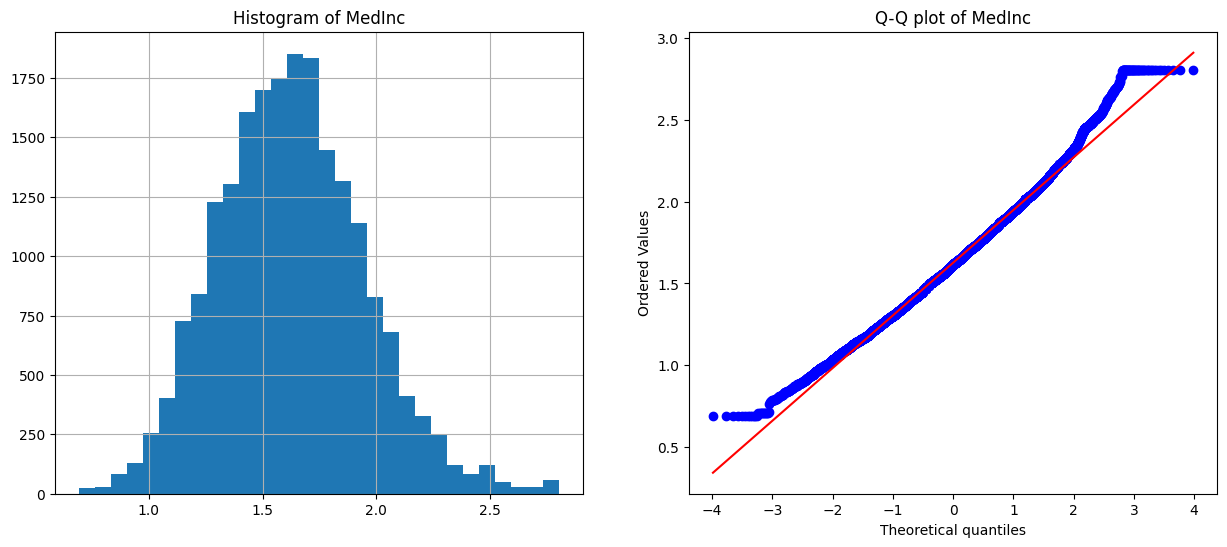

In [30]:
# transform variables & plot
X_tf = lt.transform(X)
diagnostic_plots(X_tf, "MedInc")